In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
df = pd.read_csv('orderItemsDonations.csv')
df.head()

,OrderId,OrderItemId,ProductType,ProductItem,ProductPeriod,ProductDetails,ProductStorage,Quantity
0,20051,1,DIARY,"Cheese, processed slices",1-2 months,NaN,REFRIGERATED,105
1,20051,2,DIARY,"Eggs, in shell",3-5 weeks,NaN,REFRIGERATED,120
2,20051,3,DIARY,Margarine,12 months,NaN,FROZEN,140
3,20051,4,DIARY,"Milk, plain or flavored",1 week,NaN,REFRIGERATED,135
4,20051,5,SOY,Tofu,1 week,NaN,REFRIGERATED,145


In [3]:
df.tail()

,OrderId,OrderItemId,ProductType,ProductItem,ProductPeriod,ProductDetails,ProductStorage,Quantity
9215,20139,35,SHELLFISH,"Shucked clams, mussels and oysters",3-4 months,NaN,FROZEN,150
9216,20139,36,SHELF_ITEM,"Milk, canned evaporated",4-5 days,opened,REFRIGERATED,168
9217,20139,37,PESTO,Pesto or Sala,package date,unopened,REFRIGERATED,120
9218,20139,38,BAKERY,"Rolls, yeast, baked",1 week,NaN,REFRIGERATED,168
9219,20139,39,PROCESSED_MEAT,"Lunch meats, after opening",3-5 days,NaN,REFRIGERATED,168


In [4]:
df.shape

(9220, 8)

In [5]:
df.index

RangeIndex(start=0, stop=9220, step=1)

In [6]:
df.columns

Index(['OrderId', 'OrderItemId', 'ProductType', 'ProductItem', 'ProductPeriod',
       'ProductDetails', 'ProductStorage', 'Quantity'],
      dtype='object')

In [7]:
df.values

array([[20051, 1, 'DIARY', ..., nan, 'REFRIGERATED', 105],
       [20051, 2, 'DIARY', ..., nan, 'REFRIGERATED', 120],
       [20051, 3, 'DIARY', ..., nan, 'FROZEN', 140],
       ...,
       [20139, 37, 'PESTO', ..., 'unopened', 'REFRIGERATED', 120],
       [20139, 38, 'BAKERY', ..., nan, 'REFRIGERATED', 168],
       [20139, 39, 'PROCESSED_MEAT', ..., nan, 'REFRIGERATED', 168]],
      dtype=object)

In [8]:
df.dtypes

OrderId            int64
OrderItemId        int64
ProductType       object
ProductItem       object
ProductPeriod     object
ProductDetails    object
ProductStorage    object
Quantity           int64
dtype: object

In [9]:
df.nunique()

OrderId            89
OrderItemId        39
ProductType        23
ProductItem       240
ProductPeriod      67
ProductDetails     16
ProductStorage      4
Quantity           75
dtype: int64

In [10]:
df.count()

OrderId           9220
OrderItemId       9220
ProductType       9220
ProductItem       9220
ProductPeriod     8717
ProductDetails    2033
ProductStorage    9220
Quantity          9220
dtype: int64

In [11]:
df.isnull().sum()

OrderId              0
OrderItemId          0
ProductType          0
ProductItem          0
ProductPeriod      503
ProductDetails    7187
ProductStorage       0
Quantity             0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9220 entries, 0 to 9219
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   OrderId         9220 non-null   int64 
 1   OrderItemId     9220 non-null   int64 
 2   ProductType     9220 non-null   object
 3   ProductItem     9220 non-null   object
 4   ProductPeriod   8717 non-null   object
 5   ProductDetails  2033 non-null   object
 6   ProductStorage  9220 non-null   object
 7   Quantity        9220 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 576.4+ KB


In [13]:
df.head(1)

,OrderId,OrderItemId,ProductType,ProductItem,ProductPeriod,ProductDetails,ProductStorage,Quantity
0,20051,1,DIARY,"Cheese, processed slices",1-2 months,NaN,REFRIGERATED,105


In [14]:
((df['Quantity'] > 30) & (df['Quantity'] < 120)).sum()

4903

In [15]:
(df['ProductItem'] == 'Cheese').count()

9220

In [16]:
df[(df['OrderItemId'] > 5) & (df['OrderItemId'] < 50 )]

,OrderId,OrderItemId,ProductType,ProductItem,ProductPeriod,ProductDetails,ProductStorage,Quantity
5,20051,6,PROCESSED_MEAT,Bacon,1 week,NaN,REFRIGERATED,140
6,20051,7,PROCESSED_MEAT,"Ham, canned (""keep refrigerated"" label)",6-9 months,NaN,REFRIGERATED,110
7,20051,8,FRUIT,Apples,1-2 days,NaN,SHELF,130
8,20051,9,FRUIT,Bananas,Until ripe,NaN,SHELF,100
9,20051,10,VEGETABLES,Tomatoes,Until ripe,NaN,SHELF,125
...,...,...,...,...,...,...,...,...
9215,20139,35,SHELLFISH,"Shucked clams, mussels and oysters",3-4 months,NaN,FROZEN,150
9216,20139,36,SHELF_ITEM,"Milk, canned evaporated",4-5 days,opened,REFRIGERATED,168
9217,20139,37,PESTO,Pesto or Sala,package date,unopened,REFRIGERATED,120
9218,20139,38,BAKERY,"Rolls, yeast, baked",1 week,NaN,REFRIGERATED,168


In [17]:
df.describe()

,OrderId,OrderItemId,Quantity
count,9220.000000,9220.000000,9220.000000
mean,20095.112364,17.888612,97.265618
std,25.633417,10.174807,61.170710
min,20051.000000,1.000000,20.000000
25%,20073.000000,9.000000,50.000000
50%,20095.000000,18.000000,81.000000
75%,20117.000000,26.000000,132.000000
max,20139.000000,39.000000,261.000000


In [18]:
df.min()

/tmp/ipykernel_31855/3962516015.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.min()


OrderId                                   20051
OrderItemId                                   1
ProductType                              BAKERY
ProductItem       Aerosol can, nondairy topping
ProductStorage                           FROZEN
Quantity                                     20
dtype: object

In [19]:
df.max()

/tmp/ipykernel_31855/1151452817.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.max()


OrderId                20139
OrderItemId               39
ProductType       VEGETABLES
ProductItem           Yogurt
ProductStorage        THAWED
Quantity                 261
dtype: object

In [20]:
df.mean()

/tmp/ipykernel_31855/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


OrderId        20095.112364
OrderItemId       17.888612
Quantity          97.265618
dtype: float64

In [21]:
df.median()

/tmp/ipykernel_31855/530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


OrderId        20095.0
OrderItemId       18.0
Quantity          81.0
dtype: float64

In [22]:
df.mode()

,OrderId,OrderItemId,ProductType,ProductItem,ProductPeriod,ProductDetails,ProductStorage,Quantity
0,20110.0,1,DIARY,"Milk, plain or flavored",1 week,opened,REFRIGERATED,84.0
1,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
(df['ProductItem'] == 'Milk, plain or flavored').sum()

312

In [24]:
df.isnull().sum()

OrderId              0
OrderItemId          0
ProductType          0
ProductItem          0
ProductPeriod      503
ProductDetails    7187
ProductStorage       0
Quantity             0
dtype: int64

In [25]:
missing_productperiod = df['ProductPeriod'].isnull().sum()
print(missing_productperiod)
print('-------------------------')
mode_productperiod =  df['ProductPeriod'].mode()
print(mode_productperiod) 

503
-------------------------
0    1 week
dtype: object


In [26]:
df.replace(missing_productperiod,mode_productperiod,inplace = True)

In [27]:
df.head()

,OrderId,OrderItemId,ProductType,ProductItem,ProductPeriod,ProductDetails,ProductStorage,Quantity
0,20051,1,DIARY,"Cheese, processed slices",1-2 months,NaN,REFRIGERATED,105
1,20051,2,DIARY,"Eggs, in shell",3-5 weeks,NaN,REFRIGERATED,120
2,20051,3,DIARY,Margarine,12 months,NaN,FROZEN,140
3,20051,4,DIARY,"Milk, plain or flavored",1 week,NaN,REFRIGERATED,135
4,20051,5,SOY,Tofu,1 week,NaN,REFRIGERATED,145


In [28]:
df['ProductDetails'].fillna('no_details',inplace = True)

In [29]:
df.head()

,OrderId,OrderItemId,ProductType,ProductItem,ProductPeriod,ProductDetails,ProductStorage,Quantity
0,20051,1,DIARY,"Cheese, processed slices",1-2 months,no_details,REFRIGERATED,105
1,20051,2,DIARY,"Eggs, in shell",3-5 weeks,no_details,REFRIGERATED,120
2,20051,3,DIARY,Margarine,12 months,no_details,FROZEN,140
3,20051,4,DIARY,"Milk, plain or flavored",1 week,no_details,REFRIGERATED,135
4,20051,5,SOY,Tofu,1 week,no_details,REFRIGERATED,145


<AxesSubplot:>

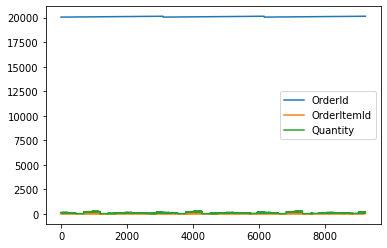

In [30]:
df.plot.line()

In [31]:
d = df.head(10)

<AxesSubplot:xlabel='ProductItem', ylabel='Quantity'>

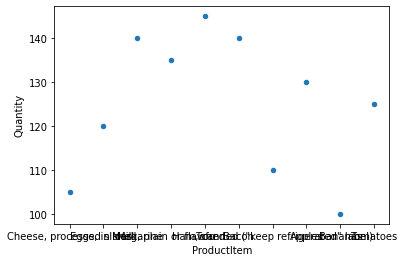

In [32]:
d.plot.scatter(x = 'ProductItem',y='Quantity',fontsize = 10)

<AxesSubplot:>

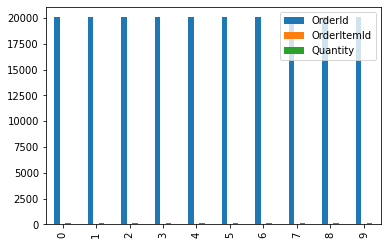

In [33]:
d.plot.bar(stacked = False)

<AxesSubplot:ylabel='Frequency'>

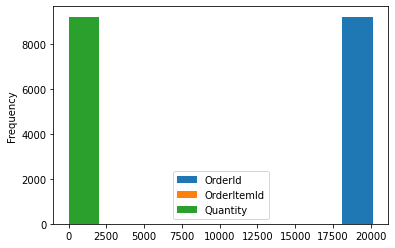

In [34]:
df.plot.hist()

<AxesSubplot:>

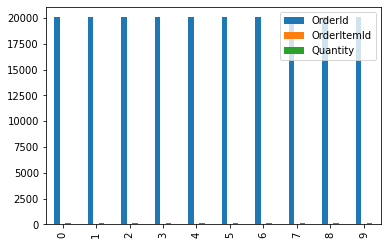

In [35]:
d.plot.bar()

<AxesSubplot:title={'center':'OrderId'}, xlabel='[ProductType]'>

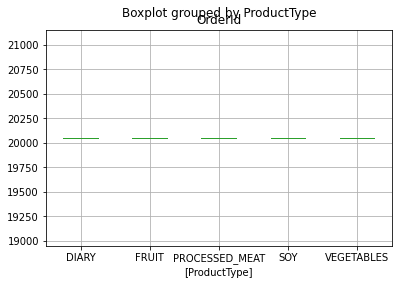

In [36]:
d.boxplot(column=["OrderId"],by = ['ProductType'])

<AxesSubplot:>

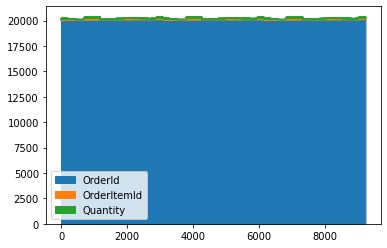

In [37]:
df.plot.area()

<AxesSubplot:xlabel='OrderItemId', ylabel='Quantity'>

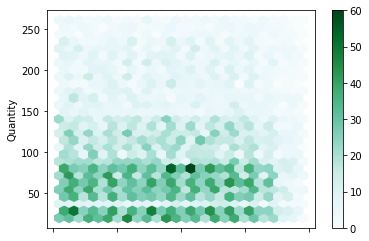

In [38]:
df.plot.hexbin(x='OrderItemId', y='Quantity', gridsize=25)

array([[<AxesSubplot:xlabel='OrderId', ylabel='OrderId'>,
        <AxesSubplot:xlabel='OrderItemId', ylabel='OrderId'>,
        <AxesSubplot:xlabel='Quantity', ylabel='OrderId'>],
       [<AxesSubplot:xlabel='OrderId', ylabel='OrderItemId'>,
        <AxesSubplot:xlabel='OrderItemId', ylabel='OrderItemId'>,
        <AxesSubplot:xlabel='Quantity', ylabel='OrderItemId'>],
       [<AxesSubplot:xlabel='OrderId', ylabel='Quantity'>,
        <AxesSubplot:xlabel='OrderItemId', ylabel='Quantity'>,
        <AxesSubplot:xlabel='Quantity', ylabel='Quantity'>]], dtype=object)

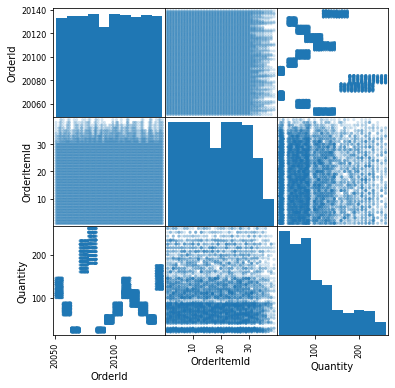

In [39]:
scatter_matrix(df, alpha=0.2, figsize=(6, 6))

In [40]:
df1 = pd.read_csv('orderItemsRequests.csv')
df1.head()

,OrderId,OrderItemId,ProductType,ProductItem,ProductPeriod,ProductDetails,ProductStorage
0,50050,1,DIARY,"Eggs, in shell",NaN,Do not freeze,FROZEN
1,50050,2,SHELF_ITEM,"Tea, bags",18 months,unopened,SHELF
2,50050,3,BAKERY,"Pies, mincemeat",8 months,NaN,FROZEN
3,50050,4,SHELF_ITEM,"Marshmallows, marshmallow creme",2-4 months,unopened,SHELF
4,50050,5,BAKERY,"Doughnuts, glazed or cake",1 week,G,REFRIGERATED


In [41]:
df1.tail()

,OrderId,OrderItemId,ProductType,ProductItem,ProductPeriod,ProductDetails,ProductStorage
5739,50068,9,BAKING,"Flour, whole wheat",6-8 months,opened,REFRIGERATED
5740,50068,10,VEGETABLES,Cauliflower,3-5 days,NaN,REFRIGERATED
5741,50068,11,PROCESSED_POULTRY,"Lunch meats, after opening",3-5 days,NaN,REFRIGERATED
5742,50068,12,SOY,"Soy or rice beverage, Re-hydrated TSP",3-4 months,unopened,SHELF
5743,50068,13,PROCESSED_MEAT,"Sausage, raw, bulk type",1-2 months,NaN,FROZEN


In [42]:
df1.index

RangeIndex(start=0, stop=5744, step=1)

In [43]:
df1.shape

(5744, 7)

In [44]:
df1.values

array([[50050, 1, 'DIARY', ..., nan, 'Do not freeze', 'FROZEN'],
       [50050, 2, 'SHELF_ITEM', ..., '18 months', 'unopened', 'SHELF'],
       [50050, 3, 'BAKERY', ..., '8 months', nan, 'FROZEN'],
       ...,
       [50068, 11, 'PROCESSED_POULTRY', ..., '3-5 days', nan,
        'REFRIGERATED'],
       [50068, 12, 'SOY', ..., '3-4 months', 'unopened', 'SHELF'],
       [50068, 13, 'PROCESSED_MEAT', ..., '1-2 months', nan, 'FROZEN']],
      dtype=object)

In [45]:
df1.columns

Index(['OrderId', 'OrderItemId', 'ProductType', 'ProductItem', 'ProductPeriod',
       'ProductDetails', 'ProductStorage'],
      dtype='object')

In [46]:
df1.dtypes

OrderId            int64
OrderItemId        int64
ProductType       object
ProductItem       object
ProductPeriod     object
ProductDetails    object
ProductStorage    object
dtype: object

In [47]:
df1.nunique()

OrderId            28
OrderItemId        18
ProductType        23
ProductItem       300
ProductPeriod      88
ProductDetails     21
ProductStorage      4
dtype: int64

In [48]:
df1.count()

OrderId           5744
OrderItemId       5744
ProductType       5744
ProductItem       5744
ProductPeriod     5425
ProductDetails    2630
ProductStorage    5744
dtype: int64

In [49]:
df1.describe()

,OrderId,OrderItemId
count,5744.000000,5744.000000
mean,50059.993036,8.005397
std,6.765052,4.513621
min,50050.000000,1.000000
25%,50054.000000,4.000000
50%,50059.000000,8.000000
75%,50065.000000,11.000000
max,50077.000000,18.000000


In [50]:
df1.isnull().sum()

OrderId              0
OrderItemId          0
ProductType          0
ProductItem          0
ProductPeriod      319
ProductDetails    3114
ProductStorage       0
dtype: int64

In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5744 entries, 0 to 5743
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   OrderId         5744 non-null   int64 
 1   OrderItemId     5744 non-null   int64 
 2   ProductType     5744 non-null   object
 3   ProductItem     5744 non-null   object
 4   ProductPeriod   5425 non-null   object
 5   ProductDetails  2630 non-null   object
 6   ProductStorage  5744 non-null   object
dtypes: int64(2), object(5)
memory usage: 314.2+ KB


In [52]:
df1['ProductPeriod'].mode()

0    12 months
dtype: object

In [53]:
df1['ProductPeriod'].fillna('12 months',inplace =True)

In [54]:
df1.head()

,OrderId,OrderItemId,ProductType,ProductItem,ProductPeriod,ProductDetails,ProductStorage
0,50050,1,DIARY,"Eggs, in shell",12 months,Do not freeze,FROZEN
1,50050,2,SHELF_ITEM,"Tea, bags",18 months,unopened,SHELF
2,50050,3,BAKERY,"Pies, mincemeat",8 months,NaN,FROZEN
3,50050,4,SHELF_ITEM,"Marshmallows, marshmallow creme",2-4 months,unopened,SHELF
4,50050,5,BAKERY,"Doughnuts, glazed or cake",1 week,G,REFRIGERATED


In [55]:
df1['ProductDetails'].mode()

0    opened
dtype: object

In [56]:
df1['ProductDetails'].fillna('opened',inplace = True)

In [57]:
df1.head()

,OrderId,OrderItemId,ProductType,ProductItem,ProductPeriod,ProductDetails,ProductStorage
0,50050,1,DIARY,"Eggs, in shell",12 months,Do not freeze,FROZEN
1,50050,2,SHELF_ITEM,"Tea, bags",18 months,unopened,SHELF
2,50050,3,BAKERY,"Pies, mincemeat",8 months,opened,FROZEN
3,50050,4,SHELF_ITEM,"Marshmallows, marshmallow creme",2-4 months,unopened,SHELF
4,50050,5,BAKERY,"Doughnuts, glazed or cake",1 week,G,REFRIGERATED


In [58]:
df1.isnull().sum()

OrderId           0
OrderItemId       0
ProductType       0
ProductItem       0
ProductPeriod     0
ProductDetails    0
ProductStorage    0
dtype: int64

<AxesSubplot:>

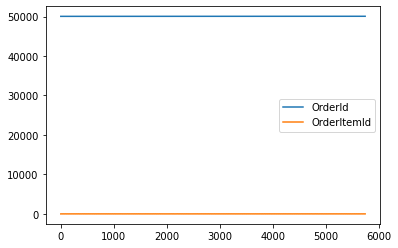

In [59]:
df1.plot.line()

In [60]:
d1 = df1.head(20) 

<AxesSubplot:>

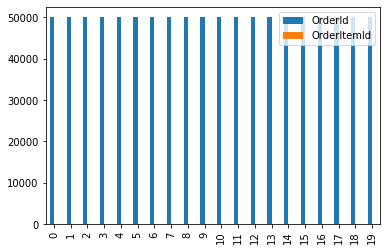

In [61]:
d1.plot.bar()

<AxesSubplot:ylabel='Frequency'>

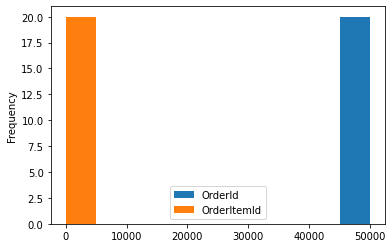

In [62]:
d1.plot.hist()

<AxesSubplot:>

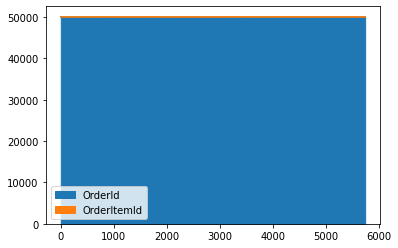

In [63]:
df1.plot.area()

<AxesSubplot:xlabel='OrderItemId', ylabel='OrderId'>

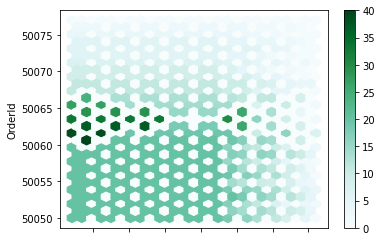

In [64]:
df1.plot.hexbin(x='OrderItemId', y='OrderId', gridsize=25)

array([[<AxesSubplot:xlabel='OrderId', ylabel='OrderId'>,
        <AxesSubplot:xlabel='OrderItemId', ylabel='OrderId'>],
       [<AxesSubplot:xlabel='OrderId', ylabel='OrderItemId'>,
        <AxesSubplot:xlabel='OrderItemId', ylabel='OrderItemId'>]],
      dtype=object)

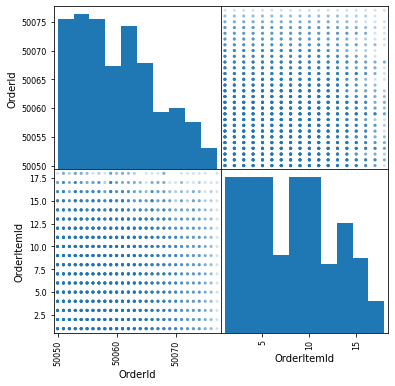

In [65]:
scatter_matrix(df1, alpha=0.2, figsize=(6, 6))

In [66]:

df_list = [df, df1]
data = pd.concat(df_list)

In [67]:
data.head()

,OrderId,OrderItemId,ProductType,ProductItem,ProductPeriod,ProductDetails,ProductStorage,Quantity
0,20051,1,DIARY,"Cheese, processed slices",1-2 months,no_details,REFRIGERATED,105.0
1,20051,2,DIARY,"Eggs, in shell",3-5 weeks,no_details,REFRIGERATED,120.0
2,20051,3,DIARY,Margarine,12 months,no_details,FROZEN,140.0
3,20051,4,DIARY,"Milk, plain or flavored",1 week,no_details,REFRIGERATED,135.0
4,20051,5,SOY,Tofu,1 week,no_details,REFRIGERATED,145.0


In [68]:
data.shape

(14964, 8)

In [69]:
data.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            5734, 5735, 5736, 5737, 5738, 5739, 5740, 5741, 5742, 5743],
           dtype='int64', length=14964)

In [70]:
data.values

array([[20051, 1, 'DIARY', ..., 'no_details', 'REFRIGERATED', 105.0],
       [20051, 2, 'DIARY', ..., 'no_details', 'REFRIGERATED', 120.0],
       [20051, 3, 'DIARY', ..., 'no_details', 'FROZEN', 140.0],
       ...,
       [50068, 11, 'PROCESSED_POULTRY', ..., 'opened', 'REFRIGERATED',
        nan],
       [50068, 12, 'SOY', ..., 'unopened', 'SHELF', nan],
       [50068, 13, 'PROCESSED_MEAT', ..., 'opened', 'FROZEN', nan]],
      dtype=object)

In [71]:
data.columns

Index(['OrderId', 'OrderItemId', 'ProductType', 'ProductItem', 'ProductPeriod',
       'ProductDetails', 'ProductStorage', 'Quantity'],
      dtype='object')

In [72]:
data.value_counts

<bound method DataFrame.value_counts of       OrderId  OrderItemId        ProductType  \
0       20051            1              DIARY   
1       20051            2              DIARY   
2       20051            3              DIARY   
3       20051            4              DIARY   
4       20051            5                SOY   
...       ...          ...                ...   
5739    50068            9             BAKING   
5740    50068           10         VEGETABLES   
5741    50068           11  PROCESSED_POULTRY   
5742    50068           12                SOY   
5743    50068           13     PROCESSED_MEAT   

                                ProductItem ProductPeriod ProductDetails  \
0                  Cheese, processed slices    1-2 months     no_details   
1                            Eggs, in shell     3-5 weeks     no_details   
2                                 Margarine     12 months     no_details   
3                   Milk, plain or flavored        1 week     no_de

In [73]:
data.dtypes

OrderId             int64
OrderItemId         int64
ProductType        object
ProductItem        object
ProductPeriod      object
ProductDetails     object
ProductStorage     object
Quantity          float64
dtype: object

In [74]:
data.isnull().sum()

OrderId              0
OrderItemId          0
ProductType          0
ProductItem          0
ProductPeriod      503
ProductDetails       0
ProductStorage       0
Quantity          5744
dtype: int64

In [75]:

data['Quantity'].fillna(data['Quantity'].mean(),inplace = True)

In [76]:
data.head()

,OrderId,OrderItemId,ProductType,ProductItem,ProductPeriod,ProductDetails,ProductStorage,Quantity
0,20051,1,DIARY,"Cheese, processed slices",1-2 months,no_details,REFRIGERATED,105.0
1,20051,2,DIARY,"Eggs, in shell",3-5 weeks,no_details,REFRIGERATED,120.0
2,20051,3,DIARY,Margarine,12 months,no_details,FROZEN,140.0
3,20051,4,DIARY,"Milk, plain or flavored",1 week,no_details,REFRIGERATED,135.0
4,20051,5,SOY,Tofu,1 week,no_details,REFRIGERATED,145.0


In [77]:
data.fillna('1 week ',inplace = True)

In [78]:
data.isnull().sum()

OrderId           0
OrderItemId       0
ProductType       0
ProductItem       0
ProductPeriod     0
ProductDetails    0
ProductStorage    0
Quantity          0
dtype: int64

In [79]:
data.corr()

,OrderId,OrderItemId,Quantity
OrderId,1.000000,-0.493898,-0.000118
OrderItemId,-0.493898,1.000000,0.006609
Quantity,-0.000118,0.006609,1.000000


In [80]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [81]:
x = data['OrderItemId']
y = data['Quantity']

In [82]:
Ys = scaler.fit_transform(pd.DataFrame(y))

In [83]:
Xs = scaler.fit_transform(pd.DataFrame(x))

In [84]:
lm = linear_model.LinearRegression()
model = lm.fit(Xs,Ys)

In [85]:
model.coef_

array([[0.0066086]])

In [86]:
model.intercept_

array([-9.89835816e-18])

In [87]:
model.score(Xs,Ys)

4.367356105994258e-05